In [1]:
# import the basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\apple_quality.csv")

In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


### Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
# We Check the Null Value
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
# Handel the Null value

In [8]:
df['Size']=df['Size'].fillna(df['Size'].mean())
df['Weight']=df['Weight'].fillna(df['Weight'].mean())
df['Sweetness']=df['Sweetness'].fillna(df['Sweetness'].mean())
df['Crunchiness']=df['Crunchiness'].fillna(df['Crunchiness'].mean())
df['Juiciness']=df['Juiciness'].fillna(df['Juiciness'].mean())
df['Ripeness']=df['Ripeness'].fillna(df['Ripeness'].mean())
df['Quality']=df['Quality'].fillna(df['Quality'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4001 non-null   float64
 2   Weight       4001 non-null   float64
 3   Sweetness    4001 non-null   float64
 4   Crunchiness  4001 non-null   float64
 5   Juiciness    4001 non-null   float64
 6   Ripeness     4001 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4001 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [10]:
# We have to convert the datatype 

In [11]:
df.Acidity=pd.to_numeric(df.Acidity,errors='coerce')

In [12]:
df['Acidity'].dtype

dtype('float64')

In [13]:
# Check the Duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# Data Encoding - Convert categorical to numerical
df = pd.get_dummies(df,drop_first=True)

In [16]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_good
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,True
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,True
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,False
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,True
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,True


In [17]:
# We can see the data is imbalanced 
df['Quality_good'].value_counts()

Quality_good
True     2005
False    1996
Name: count, dtype: int64

### EDA

### Uniariate Analysis 

In [18]:
import seaborn as sns

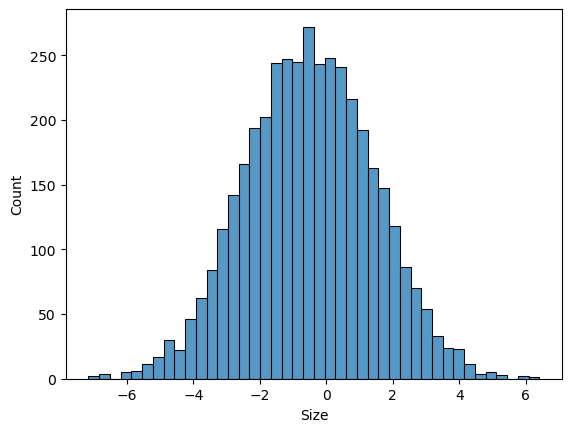

In [19]:
sns.histplot(df['Size'])
plt.show()

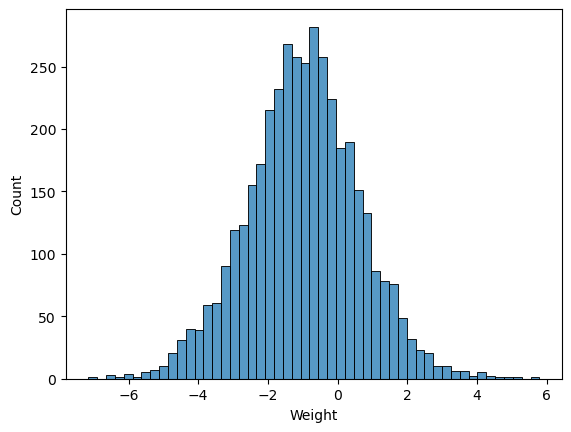

In [20]:
sns.histplot(df['Weight'])
plt.show()

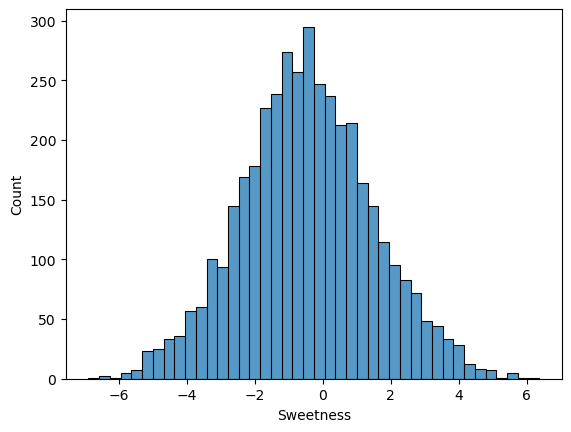

In [21]:
sns.histplot(df['Sweetness'])
plt.show()

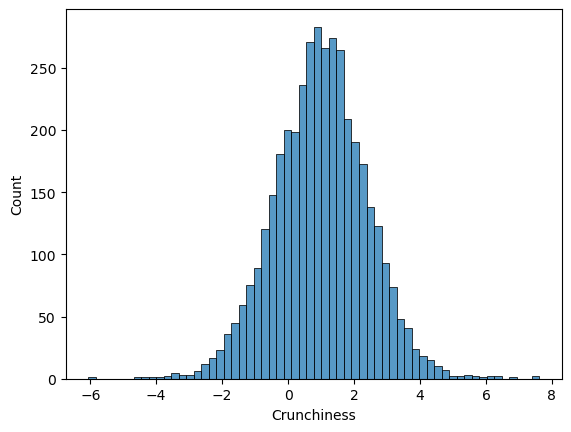

In [22]:
sns.histplot(df['Crunchiness'])
plt.show()

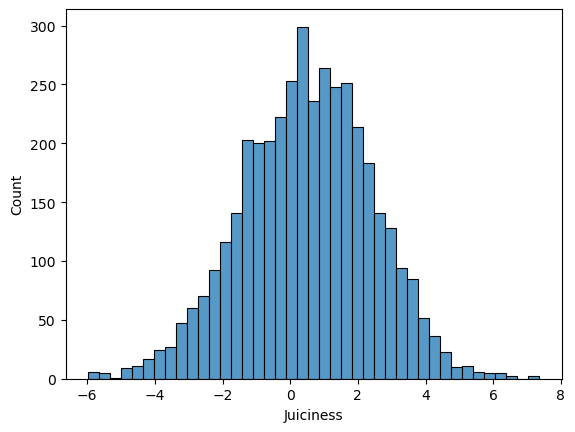

In [23]:
sns.histplot(df['Juiciness'])
plt.show()

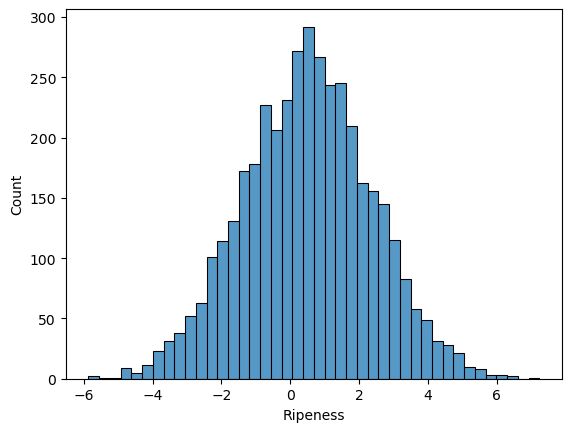

In [24]:
sns.histplot(df['Ripeness'])
plt.show()

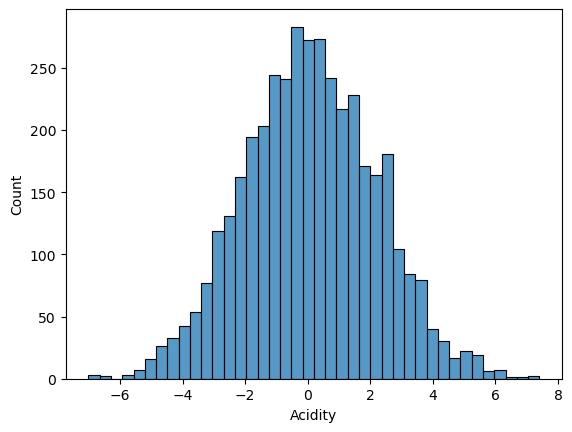

In [25]:
sns.histplot(df['Acidity'])
plt.show()

### Bi-variate analysis

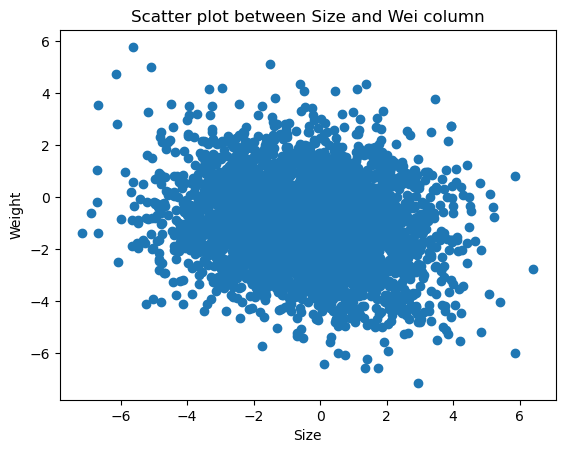

In [26]:
plt.scatter(x=df['Size'],y=df['Weight'])
plt.xlabel('Size')
plt.ylabel('Weight')
plt.title('Scatter plot between Size and Wei column')
plt.show()

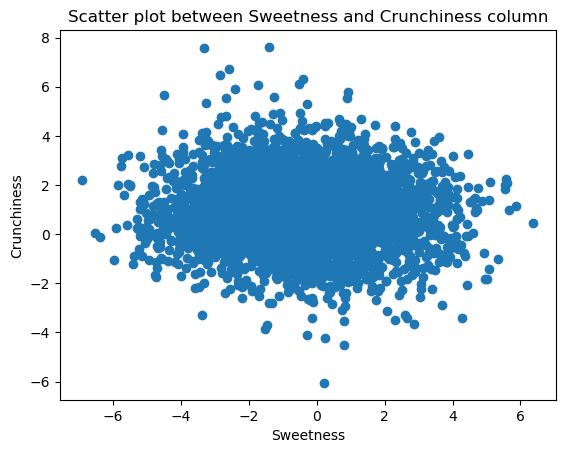

In [27]:
plt.scatter(x=df['Sweetness'],y=df['Crunchiness'])
plt.xlabel('Sweetness')
plt.ylabel('Crunchiness')
plt.title('Scatter plot between Sweetness and Crunchiness column')
plt.show()

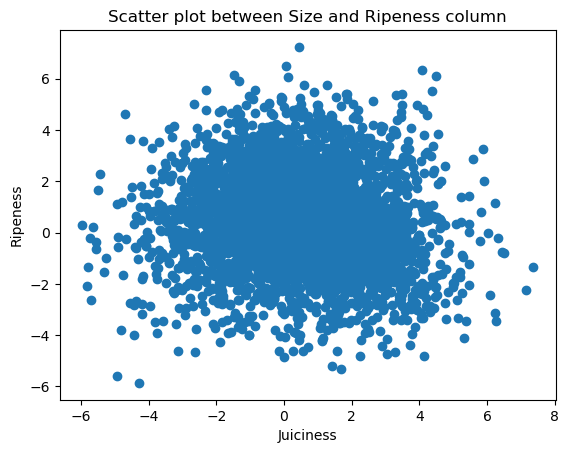

In [28]:
plt.scatter(x=df['Juiciness'],y=df['Ripeness'])
plt.xlabel('Juiciness')
plt.ylabel('Ripeness')
plt.title('Scatter plot between Size and Ripeness column')
plt.show()

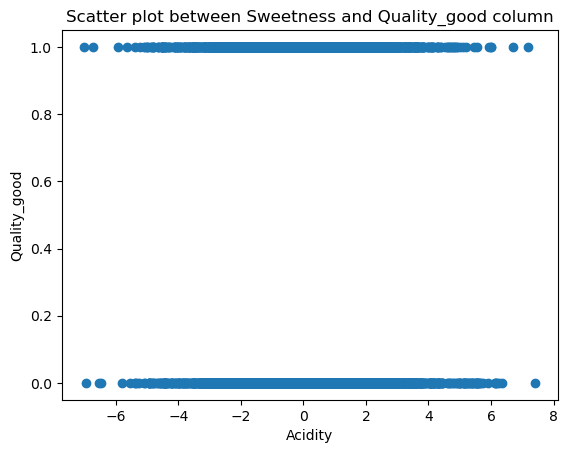

In [29]:
plt.scatter(x=df['Acidity'],y=df['Quality_good'])
plt.xlabel('Acidity')
plt.ylabel('Quality_good')
plt.title('Scatter plot between Sweetness and Quality_good column')
plt.show()

###  Multivariate Analysis

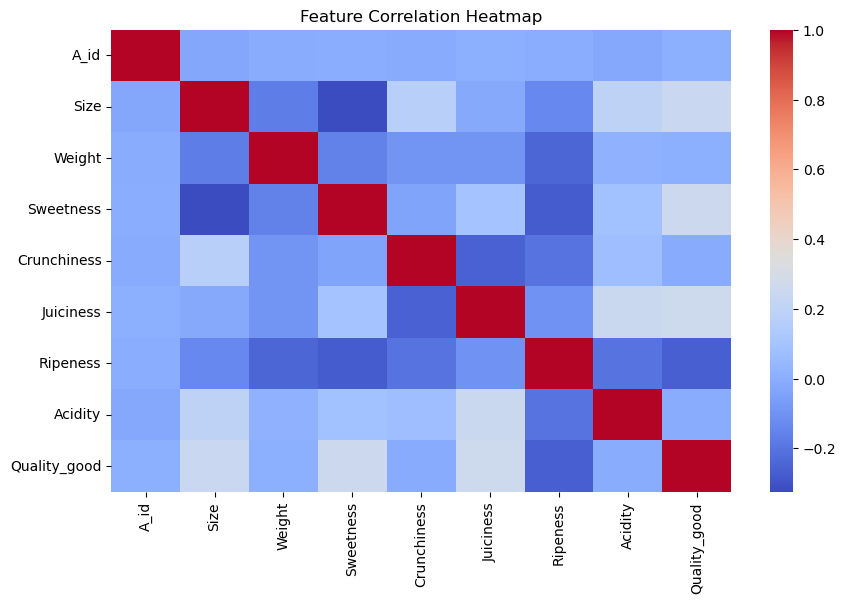

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [31]:
# Split the data training and testing

In [32]:
X = df.drop(['Quality_good','A_id',], axis=1)#Independent Variable
y = df['Quality_good']#Target

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train.shape,y_train.shape

((3200, 7), (3200,))

In [36]:
X_test.shape,y_test.shape

((801, 7), (801,))

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean()) # only transform test

In [39]:
scaler=StandardScaler()

In [40]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### 1 Logisitc Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# For Model Evalution
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [43]:
model=LogisticRegression()

In [44]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [45]:
y_pred= model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

       False       0.74      0.76      0.75       391
        True       0.77      0.75      0.76       410

    accuracy                           0.75       801
   macro avg       0.75      0.75      0.75       801
weighted avg       0.75      0.75      0.75       801

ROC-AUC: 0.8310960014970993


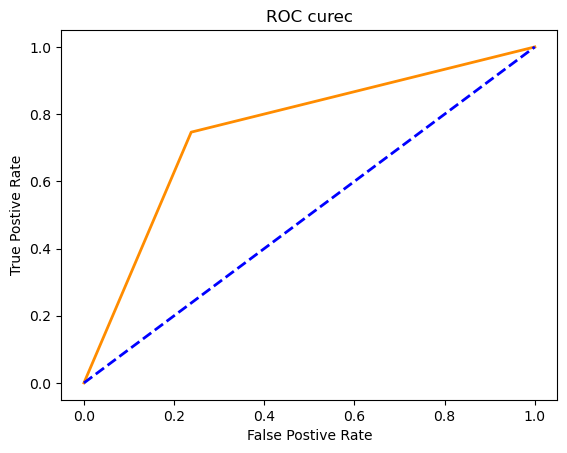

In [46]:
fpr,tpr,_=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle="--")

plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")

plt.title("ROC curec")
plt.show()

### 2 -  RandomForest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_rf = RandomForestClassifier(n_estimators=500,criterion="entropy",oob_score=True,random_state=42)

In [49]:
model_rf.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, oob_score=True,
                       random_state=42)

In [50]:
y_pred= model_rf.predict(X_test_scaled)
y_prob = model_rf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

       False       0.90      0.91      0.91       391
        True       0.91      0.90      0.91       410

    accuracy                           0.91       801
   macro avg       0.91      0.91      0.91       801
weighted avg       0.91      0.91      0.91       801

ROC-AUC: 0.9638762397854159


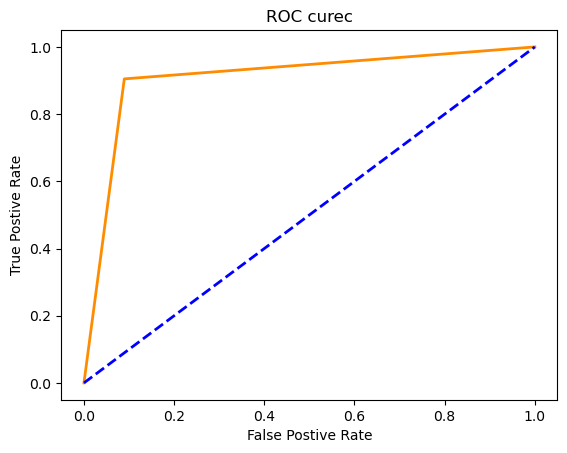

In [51]:
fpr,tpr,_=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle="--")

plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")

plt.title("ROC curec")
plt.show()

###  3 - XGBClassifier Model

In [52]:
from xgboost import XGBClassifier

In [53]:
model_xg = XGBClassifier()

In [54]:
model_xg.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
y_pred= model_xg.predict(X_test_scaled)
y_prob = model_xg.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

       False       0.90      0.93      0.91       391
        True       0.93      0.90      0.91       410

    accuracy                           0.91       801
   macro avg       0.91      0.91      0.91       801
weighted avg       0.91      0.91      0.91       801

ROC-AUC: 0.9654669078660095


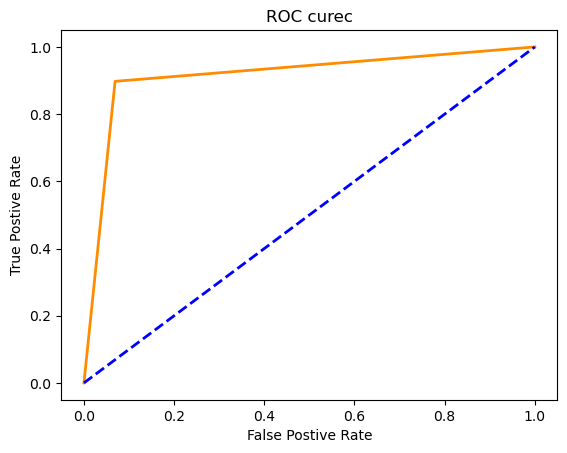

In [56]:
fpr,tpr,_=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle="--")

plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")

plt.title("ROC curec")
plt.show()

### 4 - Boosting - Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
model_gb=GradientBoostingClassifier(n_estimators=150,verbose=2)

In [59]:
model_gb.fit(X_train_scaled,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3414            2.58s
         2           1.3020            2.62s
         3           1.2579            2.73s
         4           1.2183            2.77s
         5           1.1878            2.80s
         6           1.1579            2.75s
         7           1.1316            2.67s
         8           1.1090            2.62s
         9           1.0873            2.60s
        10           1.0656            2.56s
        11           1.0452            2.52s
        12           1.0268            2.49s
        13           1.0107            2.49s
        14           0.9976            2.47s
        15           0.9861            2.43s
        16           0.9746            2.40s
        17           0.9607            2.37s
        18           0.9502            2.34s
        19           0.9392            2.32s
        20           0.9300            2.28s
        21           0.9170            2.25s
        2

GradientBoostingClassifier(n_estimators=150, verbose=2)

In [60]:
y_pred= model_gb.predict(X_test_scaled)
y_prob = model_gb.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

       False       0.86      0.88      0.87       391
        True       0.89      0.86      0.87       410

    accuracy                           0.87       801
   macro avg       0.87      0.87      0.87       801
weighted avg       0.87      0.87      0.87       801

ROC-AUC: 0.9475453808246521


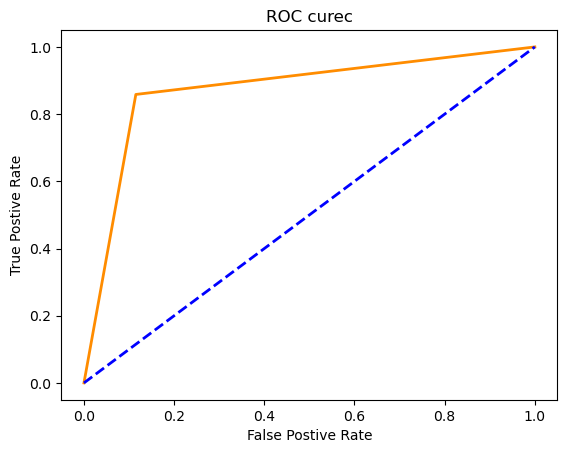

In [61]:
fpr,tpr,_=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle="--")

plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")

plt.title("ROC curec")
plt.show()

### 5 - DecisionTreeClassifier Model

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
clf_dt=DecisionTreeClassifier(criterion='gini',random_state=42)

In [64]:
clf_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
y_pred= clf_dt.predict(X_test_scaled)
y_prob = clf_dt.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

       False       0.78      0.81      0.80       391
        True       0.81      0.79      0.80       410

    accuracy                           0.80       801
   macro avg       0.80      0.80      0.80       801
weighted avg       0.80      0.80      0.80       801

ROC-AUC: 0.79927328301416


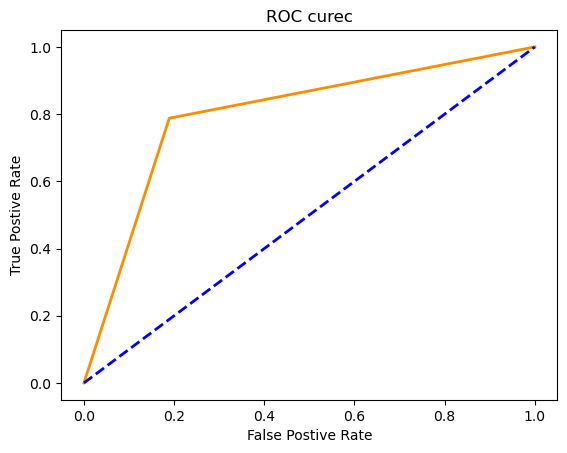

In [66]:
fpr,tpr,_=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle="--")

plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")

plt.title("ROC curec")
plt.show()

### HyperParameter-Tuning

In [67]:
# For HypeParameter
from sklearn.model_selection import GridSearchCV

In [68]:
model_xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss"
)



In [69]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}



In [70]:
grid_search = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)


In [71]:
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [72]:
best_params=grid_search.best_params_
print("Best Hayperparameter: ",best_params)

Best Hayperparameter:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [73]:
best_scores=grid_search.best_score_
print("Best Hyperparameter - Score is",best_scores)

Best Hyperparameter - Score is 0.9546909637789431


In [74]:
best_model=XGBClassifier(**best_params)

In [75]:
best_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [76]:
# 1) Get class predictions (0/1) for classification_report
y_pred_hy = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_hy))

# 2) Use probabilities only for ROC-AUC
y_proba_hy = best_model.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba_hy))

# 3) If you also use roc_curve:
fpr, tpr, _ = roc_curve(y_test, y_proba_hy)


              precision    recall  f1-score   support

       False       0.91      0.92      0.91       391
        True       0.92      0.91      0.92       410

    accuracy                           0.92       801
   macro avg       0.92      0.92      0.92       801
weighted avg       0.92      0.92      0.92       801

ROC-AUC: 0.967843553115838


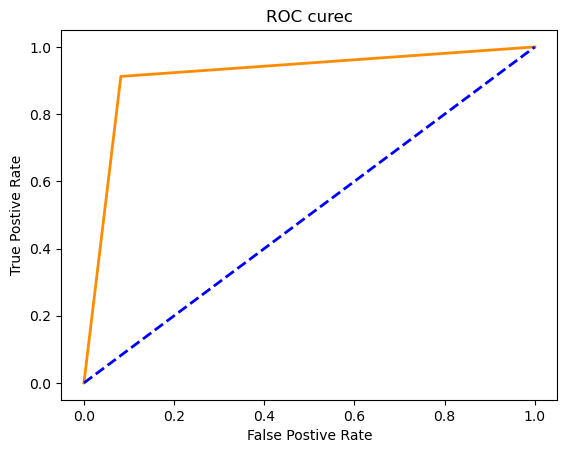

In [77]:
fpr,tpr,_=roc_curve(y_test,y_pred_hy)
plt.plot(fpr,tpr,color='darkorange',lw=2)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle="--")

plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")

plt.title("ROC curec")
plt.show()